In [2]:
import sklearn as sk
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm

In [3]:
iris = datasets.load_iris()

In [4]:
#iris数据库中的label分为0、1、2
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [5]:
Y = iris.target
X = iris.data[:]

In [6]:
#划分并随即打乱数据
train_data, test_data, train_label, test_label = train_test_split(X, Y, random_state=1, train_size=0.7,test_size=0.3)

In [13]:
#测试不同种类分类器
i=1
C = 1.0  
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
for model in models:
    model.fit(train_data,train_label)
    print("分类器{}：train_acc: {}, test_acc: {}".format(i,round(model.score(train_data,train_label),2),round(model.score(test_data,test_label),2)))
    i+=1 

分类器1：train_acc: 0.98, test_acc: 1.0
分类器2：train_acc: 0.97, test_acc: 0.91
分类器3：train_acc: 0.98, test_acc: 0.96
分类器4：train_acc: 0.97, test_acc: 1.0


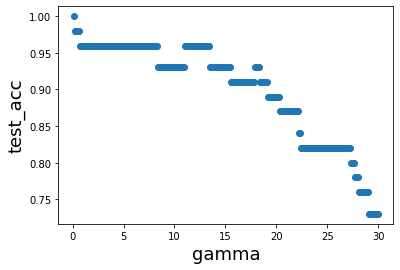

In [10]:
#针对高斯核中gamma参数进行测试
i=0
x=[]
y=[]
for j in range(300):
    i+=1
    model = svm.SVC(C=5, kernel='rbf',gamma=i*0.1)
    model.fit(train_data,train_label)
    x.append(i*0.1)
    y.append(round(model.score(test_data,test_label),2))
plt.scatter(x,y)
plt.xlabel("gamma",fontsize=18)
plt.ylabel("test_acc",fontsize=18)
plt.show()

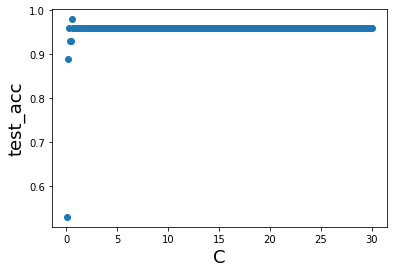

In [11]:
#针对高斯核中正则化参数进行测试
i=0
x=[]
y=[]
for j in range(300):
    i+=1
    model = svm.SVC(C=i*0.1, kernel='rbf',gamma=5 ,decision_function_shape='ovr')
    model.fit(train_data,train_label)
    x.append(i*0.1)
    y.append(round(model.score(test_data,test_label),2))
plt.scatter(x,y)
plt.xlabel("C",fontsize=18)
plt.ylabel("test_acc",fontsize=18)
plt.show()

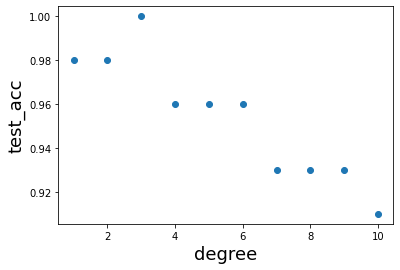

In [12]:
#针对多项式回归中degree函数进行测试
i=0
x=[]
y=[]
for j in range(10):
    i+=1
    model = svm.SVC(C=1, kernel='poly',degree=i,gamma='auto')
    model.fit(train_data,train_label)
    x.append(i)
    y.append(round(model.score(test_data,test_label),2))
plt.scatter(x,y)
plt.xlabel("degree",fontsize=18)
plt.ylabel("test_acc",fontsize=18)
plt.show()